# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Hana Amirah Natasya
- **Email:** hanaamirahn@students.unnes.ac.id
- **ID Dicoding:** hana_an

## Menentukan Pertanyaan Bisnis

- Seberapa besar pengaruh hari kerja dan hari libur terhadap jumlah sewa sepeda?
- Bagaimana pengaruh cuaca terhadap jumlah pengguna sepeda?
- Seberapa besar perbedaan jumlah pengguna casual dan registered pada tiap tahunnya?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("/content/day.csv")
print(day_df.shape)
day_df.head()

(731, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("/content/hour.csv")
print(hour_df.shape)
hour_df.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

Dari hasil diatas dapat dilihat bahwa:
- Data day berisi 16 kolom sedangkan data hour berisi 17 kolom, ini hanya dibedakan pada kolom **hr** yang ada di data hour yang berisi informasi jam untuk peminjaman sepeda.
- Data hour memuat lebih banyak data yakni sebanyak 17379 sedangkan data day memuat sebanyak 731.
-  Berdasarkan pertanyaan bisnis yang telah dibuat, tidak ada pertanyaan terkait jam, maka pada proyek ini **hanya perlu menggunakan data day** saja.
- Untuk penjelasan tiap kolom pada kedua dataset tersebut adalah sebagai berikut:
     1. instant: Nomor urut dari data, biasanya digunakan sebagai identifikasi unik untuk setiap baris.
     2. dteday: Tanggal dalam format YYYY-MM-DD. Ini menunjukkan tanggal pengamatan data.
     3. season: Menunjukkan musim dalam angka:
     - 1: Musim semi
     - 2: Musim panas
     - 3: Musim gugur
     - 4: Musim dingin
     4. yr: Tahun dari data, diwakili dengan angka:
     - 0: Tahun 2011
     - 1: Tahun 2012
     5. mnth: Bulan dalam angka (1-12), menunjukkan bulan dari tanggal yang tertera.
     6. hr: Jam dalam format 24 jam (0-23), menunjukkan waktu dari pengamatan.
     7. holiday: Indikator apakah hari tersebut adalah hari libur atau bukan:
     - 0: Bukan hari libur
     - 1: Hari libur
     8. weekday: Hari dalam minggu yang diwakili dengan angka (0-6), di mana:
     - 0: Minggu
     - 1: Senin
     - 2: Selasa
     - 3: Rabu
     - 4: Kamis
     - 5: Jumat
     - 6: Sabtu
     9. workingday: Indikator apakah hari tersebut adalah hari kerja atau bukan:
     - 0: Bukan hari kerja
     - 1: Hari kerja
     10. weathersit: Kategori cuaca yang diwakili dengan angka:
     - 1: Cuaca yang baik
     - 2: Cuaca berkabut
     - 3: Cuaca hujan ringan atau salju
     - 4: Cuaca buruk
     11. temp: Suhu dalam skala normal (0-1), di mana 1 menunjukkan suhu maksimum.
     12. atemp: Suhu yang dirasakan (apparent temperature) dalam skala normal (0-1).
     13. hum: Kelembapan relatif dalam skala normal (0-1).
     14. windspeed: Kecepatan angin dalam skala normal (0-1).
     15. casual: Jumlah pengguna sepeda yang terdaftar sebagai pengguna biasa (casual users).
     16. registered: Jumlah pengguna sepeda yang terdaftar sebagai pengguna terdaftar (registered users).
     17. cnt: Total jumlah pengguna sepeda (casual + registered).

### Assessing Data

In [4]:
# Menampilkan informasi pada dataset
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Memeriksa missing value
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
# Memeriksa duplikasi data
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
# Memeriksa parameter statistik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**

Pada menilai data day_df ini dapat dilihat bahwa:
- Ada ketidaksesuaian tipe data, pada kolom dteday yang bertipe object yang seharusnya bertipe datetime.
- Tidak terdapat missing value pada data day_df
- Tidak terdapat duplikasi data

### Cleaning Data

In [8]:
# Mengubah tipe data object ke datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [9]:
# Mengubah nama kolom agar mudah dipahami
day_df.rename(columns={
    'dteday':'date',
    'yr':'year',
    'weathersit':'weather_condition',
    'mnth':'month',
    'cnt' : 'count'
    },inplace=True)

In [10]:
# Mengubah angka-angka menjadi teks agar lebih mudah di analisis
# Season
day_df.season.replace((1,2,3,4),('Spring','Summer','Fall','Winter'),inplace=True)

# Year
day_df.year.replace((0,1),('2011','2012'),inplace=True)

# Month
day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# Holiday
day_df.holiday.replace((0,1),('No','Yes'),inplace=True)

# Weekday
day_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# Workingday
day_df.workingday.replace((0,1),('No','Yes'),inplace=True)

# Weather Condition
day_df.weather_condition.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

day_df.head()

<ipython-input-10-310be91461d6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.season.replace((1,2,3,4),('Spring','Summer','Fall','Winter'),inplace=True)
<ipython-input-10-310be91461d6>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,No,Saturday,No,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,No,Sunday,No,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,No,Monday,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,No,Tuesday,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,No,Wednesday,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**

Pada proses cleaning data ini dihasilkan:
- Telah mengubah tipe data object ke datetime pada kolom dteday
- Telah mengubah beberapa nama kolom agar mudah dipahami
- Serta terakhir telah mengubah angka-angka menjadi teks agar mempermudah proses analisis selanjutnya

In [11]:
day_df.to_csv("day_clean.csv")

## Exploratory Data Analysis (EDA)

### Explore ...

In [12]:
# Melihat rangkuman parameter statistik
day_df.describe(include="all")

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,hum,windspeed,casual,registered,count
count,731.000000,731,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,Jan,No,Saturday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [13]:
# Melihat distribusi dan jumlah data pada hari kerja dan hari libur
# Weekday (Hari Kerja)
day_df.groupby(by='weekday').agg({
    'casual': ['sum', 'max', 'min', 'mean'],
    'registered': ['sum', 'max', 'min', 'mean'],
    'count': ['sum', 'max', 'min', 'mean']
}).sort_values(by=('count', 'sum'), ascending=True)

casual                        registered                           \
              sum   max min         mean        sum   max   min         mean   
weekday                                                                        
Sunday     140521  3283  54  1338.295238     303506  5657   451  2890.533333   
Monday      70784  3065   2   674.133333     384719  6435    20  3663.990476   
Tuesday     57843  1348   9   556.182692     411266  6697   573  3954.480769   
Wednesday   57319  2562   9   551.144231     415729  6946   432  3997.394231   
Saturday   153852  3410  57  1465.257143     323955  5966   570  3085.285714   
Thursday    61460  1405  15   590.961538     423935  6781   416  4076.298077   
Friday      78238  2469  38   752.288462     409552  6917  1129  3938.000000   

            count                           
              sum   max   min         mean  
weekday                                     
Sunday     444027  8227   605  4228.828571  
Monday     455503  7525    22  4338.123810  
Tuesday    469109  7767   683  4510.663462  
Wednesday  473048  8173   441  4548.538462  
Saturday   477807  8714   627  4550.542857  
Thursday   485395  7804   431  4667.259615  
Friday     487790  8362  1167  4690.288462

In [14]:
# Workingday
day_df.groupby(by='workingday').agg({
    'casual': ['sum', 'max', 'min', 'mean'],
    'registered': ['sum', 'max', 'min', 'mean'],
    'count': ['sum', 'max', 'min', 'mean']
}).sort_values(by=('count', 'sum'), ascending=True)

casual                        registered                          \
               sum   max min         mean        sum   max  min         mean   
workingday                                                                     
No          316732  3410  54  1371.134199     683537  5966  451  2959.034632   
Yes         303285  2469   2   606.570000    1989125  6946   20  3978.250000   

              count                          
                sum   max  min         mean  
workingday                                   
No          1000269  8714  605  4330.168831  
Yes         2292410  8362   22  4584.820000

In [15]:
# Holiday
day_df.groupby(by='holiday').agg({
    'casual': ['sum', 'max', 'min', 'mean'],
    'registered': ['sum', 'max', 'min', 'mean'],
    'count': ['sum', 'max', 'min', 'mean']
}).sort_values(by=('count', 'sum'), ascending=True)

casual                         registered                          \
            sum   max  min         mean        sum   max  min         mean   
holiday                                                                      
Yes       22359  3065  117  1064.714286      56076  5172  573  2670.285714   
No       597658  3410    2   841.771831    2616586  6946   20  3685.332394   

           count                           
             sum   max   min         mean  
holiday                                    
Yes        78435  7403  1000  3735.000000  
No       3214244  8714    22  4527.104225

Berdasarkan hari kerja dan hari libur ada pengaruh untuk penyewaan sepeda:
- Berdasarkan weekday, jumlah penyewa sepeda terbesar pada hari **Jumat** dengan penyewa **casual** **2469**, **registered 	6917**, dan total **semua penyewa adalah 	8362**
- Berdasarkan workingday, jumlah penyewa sepeda terbesar pada **saat working day** yakni dengan **casual** **2469**, **registered 	6946**, dan total **semua penyewa adalah 		8362**
- Berdasarkan holiday, jumlah penyewa terbesar **pada saat tidak holiday** yakni dengan  **casual** **3410**, **registered 	6946**, dan total **semua penyewa adalah 		8714**

In [16]:
# Melihat distribusi dan jumlah data pada cuaca
day_df.groupby(by='weather_condition').agg({
    'casual': ['sum', 'max', 'min', 'mean'],
    'registered': ['sum', 'max', 'min', 'mean'],
    'count': ['sum', 'max', 'min', 'mean']
}).sort_values(by=('count', 'sum'), ascending=True)

casual                       registered             \
                      sum   max min        mean        sum   max  min   
weather_condition                                                       
Light_rainsnow       3895  1264   2  185.476190      33974  4324   20   
Misty              169776  3155   9  687.352227     827082  6844  491   
Clear              446346  3410  15  964.030238    1811606  6946  416   

                                  count                          
                          mean      sum   max  min         mean  
weather_condition                                                
Light_rainsnow     1617.809524    37869  4639   22  1803.285714  
Misty              3348.510121   996858  8362  605  4035.862348  
Clear              3912.755940  2257952  8714  431  4876.786177

Berdasarkan hari kerja dan hari libur ada pengaruh untuk penyewaan sepeda:
- Pada cuaca light rainsnow atau hujan ringan jumlah penyewa paling sedikit yakni **4639**
- Sedangkan untuk penyewa paling banyak ada pada cuaca clear atau cerah dengan jumlah penyewa **8714**
- Pada saat cuaca misty atau berkabut jumlah penyewa sepeda adalah **8362**

In [17]:
# Melihat distribusi dan jumlah data pada jumlah penyewa casual dan penyewa registered
day_df.groupby(by='year').agg({
    'casual': ['sum', 'max', 'min', 'mean'],
    'registered': ['sum', 'max', 'min', 'mean'],
    'count': ['sum', 'max', 'min', 'mean']
}).sort_values(by=('count', 'sum'), ascending=True)

casual                        registered                          \
         sum   max min         mean        sum   max  min         mean   
year                                                                     
2011  247252  3065   9   677.402740     995851  4614  416  2728.358904   
2012  372765  3410   2  1018.483607    1676811  6946   20  4581.450820   

        count                          
          sum   max  min         mean  
year                                   
2011  1243103  6043  431  3405.761644  
2012  2049576  8714   22  5599.934426

## Visualization & Explanatory Analysis

### Pertanyaan 1: Seberapa besar pengaruh hari kerja dan hari libur terhadap jumlah sewa sepeda?

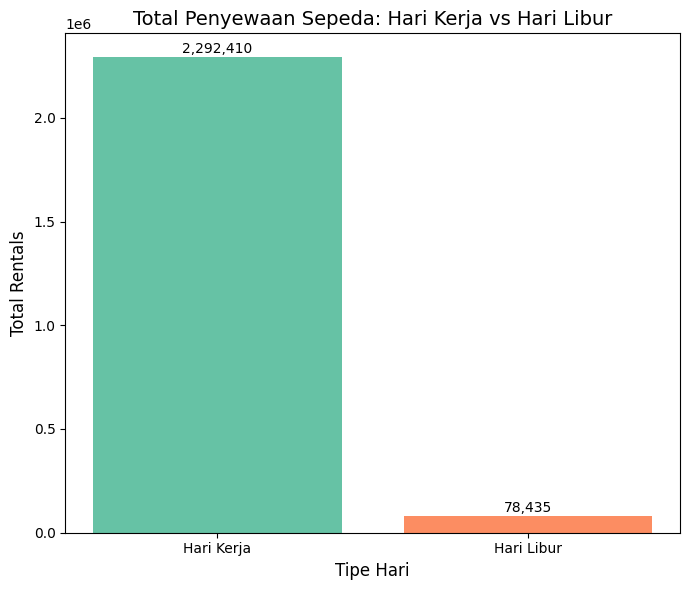

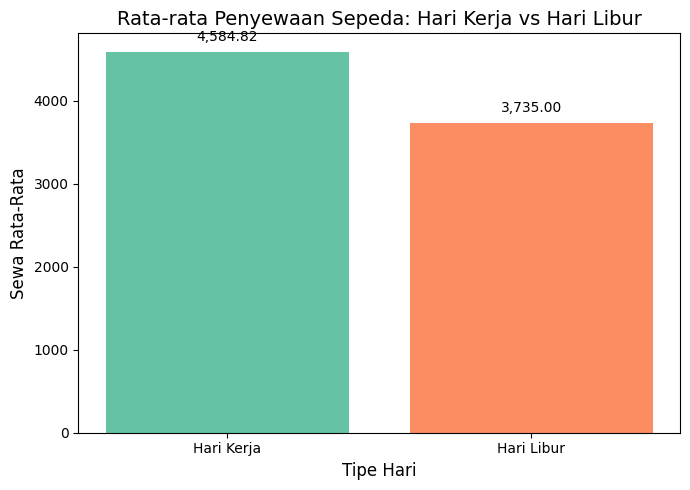

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by workingday dan holiday
workingday_summary = day_df.groupby('workingday').agg({
    'count': ['sum', 'mean']
}).reset_index()

holiday_summary = day_df.groupby('holiday').agg({
    'count': ['sum', 'mean']
}).reset_index()

# Menggabungkan data workingday dan holiday untuk perbandingan
comparison_df = pd.DataFrame({
    'Type of Day': ['Hari Kerja', 'Hari Libur'],
    'Total Count': [workingday_summary.loc[1, ('count', 'sum')], holiday_summary.loc[1, ('count', 'sum')]],
    'Mean Count': [workingday_summary.loc[1, ('count', 'mean')], holiday_summary.loc[1, ('count', 'mean')]]
})

# --- Visualisasi Total Sewa Sepeda pada Hari Kerja dan Libur ---
plt.figure(figsize=(7, 6))

# Menggunakan palet warna dari seaborn
colors = sns.color_palette('Set2', 2)

# Plot Total Sewa Sepeda
bars_total = plt.bar(comparison_df['Type of Day'], comparison_df['Total Count'], color=colors)

# Menambahkan label dan judul
plt.xlabel('Tipe Hari', fontsize=12)
plt.ylabel('Total Rentals', fontsize=12)
plt.title('Total Penyewaan Sepeda: Hari Kerja vs Hari Libur', fontsize=14)

# Tambahkan angka di atas bar dengan lebih rapi
for bar in bars_total:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5000, f'{int(yval):,}',
             ha='center', va='bottom', fontsize=10)

# Tampilkan grafik
plt.tight_layout()
plt.show()

# --- Visualisasi Rata-rata Sewa Sepeda pada Hari Kerja dan Libur ---
plt.figure(figsize=(7, 5))

# Plot Rata-rata Sewa Sepeda
bars_mean = plt.bar(comparison_df['Type of Day'], comparison_df['Mean Count'], color=colors)

# Menambahkan label dan judul
plt.xlabel('Tipe Hari', fontsize=12)
plt.ylabel('Sewa Rata-Rata', fontsize=12)
plt.title('Rata-rata Penyewaan Sepeda: Hari Kerja vs Hari Libur', fontsize=14)

# Tambahkan angka di atas bar dengan lebih rapi
for bar in bars_mean:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 100, f'{yval:,.2f}',
             ha='center', va='bottom', fontsize=10)

# Tampilkan grafik
plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana pengaruh cuaca terhadap jumlah pengguna sepeda?

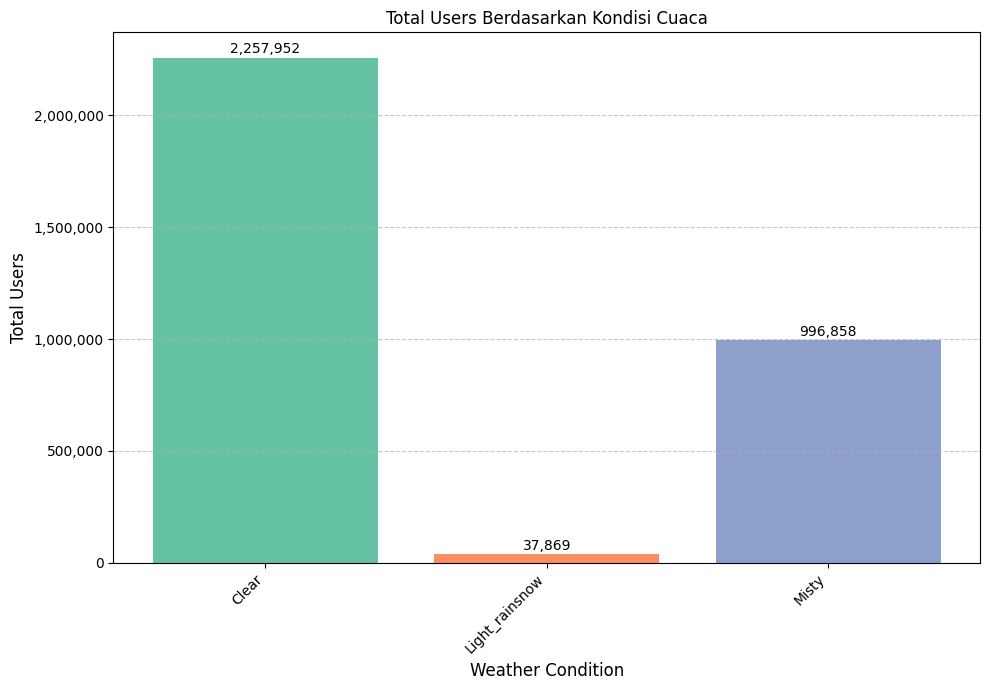

In [19]:
# Group by berdasarkan weather_condition
group_df = day_df.groupby(by='weather_condition').agg({
    'count': 'sum'
}).reset_index()

# Ambil data dari hasil groupby
weather_condition = group_df['weather_condition']
count = group_df['count']

# Buat figure dan axis dengan ukuran lebih besar
plt.figure(figsize=(10, 7))

# Menggunakan palet warna dari seaborn
colors = sns.color_palette("Set2", len(weather_condition))

# Plot bar
bars = plt.bar(weather_condition, count, color=colors)

# Format angka pada sumbu y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Tambahkan label dan judul
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Total Users', fontsize=12)
plt.title('Total Users Berdasarkan Kondisi Cuaca', fontsize=12)

# Tambahkan garis grid untuk memperjelas
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan jumlah di atas bar dengan lebih baik
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5000, format(int(yval), ','),
             ha='center', va='bottom', fontsize=10)

# Tampilkan grafik
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

**Insight:**
- xxx
- xxx

### Pertanyaan 3: Seberapa besar perbedaan jumlah pengguna casual dan registered pada tiap tahunnya?

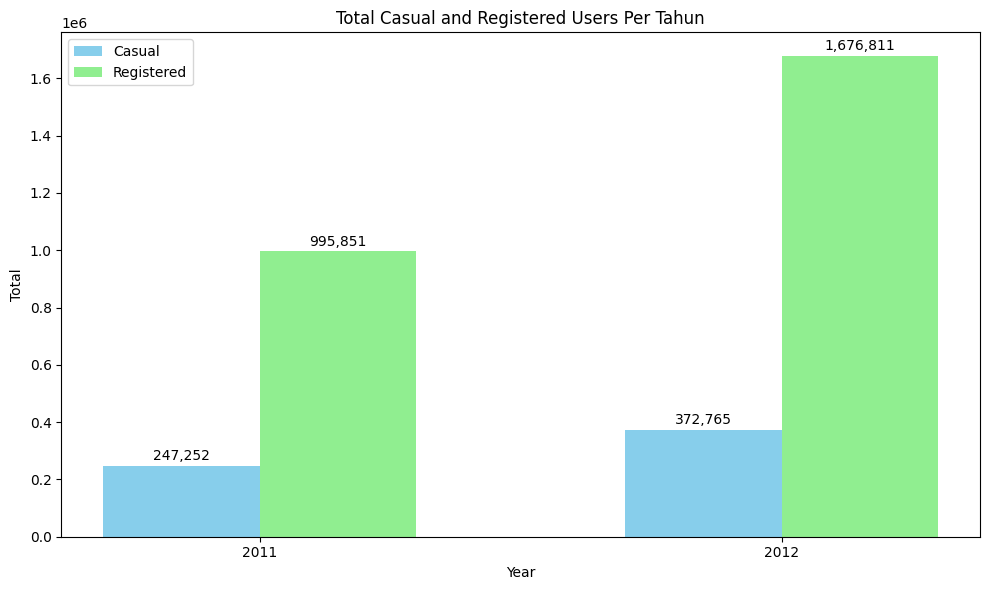

In [20]:
# Hitung total keseluruhan dari 'casual' dan 'registered' per tahun
yearly_counts = day_df.groupby('year').agg({
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()

# Data untuk bar chart
years = yearly_counts['year']
casual_counts = yearly_counts['casual']
registered_counts = yearly_counts['registered']

# Buat bar chart untuk total pengguna per tahun
plt.figure(figsize=(10, 6))

# Mengatur posisi bar
bar_width = 0.30
x = range(len(years))

# Plot batang untuk 'casual' dan 'registered'
plt.bar(x, casual_counts, width=bar_width, color='skyblue', label='Casual')
plt.bar([p + bar_width for p in x], registered_counts, width=bar_width, color='lightgreen', label='Registered')

# Tambahkan label dan judul
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Total Casual and Registered Users Per Tahun')
plt.xticks([p + bar_width / 2 for p in x], years)  # Menempatkan tahun di tengah antara dua batang

# Tambahkan nilai di atas bar
for i, (casual, registered) in enumerate(zip(casual_counts, registered_counts)):
    plt.text(i, casual + 10000, f'{casual:,}', ha='center', va='bottom')
    plt.text(i + bar_width, registered + 10000, f'{registered:,}', ha='center', va='bottom')

# Menambahkan legend
plt.legend()

# Tampilkan grafik
plt.tight_layout()
plt.show()


## Conclusion

- Conclution pertanyaan 1

Gambar yang menunjukkan perbandingan jumlah sewa sepeda antara hari kerja dan hari libur mencerminkan pengaruh signifikan dari jenis hari terhadap aktivitas bersepeda. Pada hari kerja, jumlah sewa sepeda menunjukkan angka yang jauh lebih tinggi dibandingkan hari libur. Hal ini terlihat dari data yang menunjukkan bahwa pengguna cenderung lebih aktif menggunakan sepeda saat hari kerja, mungkin karena kebutuhan untuk berangkat kerja atau beraktivitas sehari-hari. Faktor ini mungkin mencakup kemudahan akses transportasi dan efisiensi waktu yang ditawarkan oleh sepeda, terutama di kota-kota dengan kemacetan.

Sebaliknya, pada hari libur, meskipun jumlah sewa sepeda tetap ada, angka tersebut jauh lebih rendah. Ini bisa disebabkan oleh berbagai alasan, seperti orang-orang lebih memilih untuk bersantai di rumah atau melakukan aktivitas lain yang tidak melibatkan penggunaan sepeda. Selain itu, pada hari libur, beberapa orang mungkin lebih memilih untuk menggunakan kendaraan pribadi atau transportasi umum untuk perjalanan jauh, yang berkontribusi pada pengurangan jumlah sewa sepeda.

Kesimpulannya, analisis ini menunjukkan bahwa **hari kerja memiliki pengaruh yang lebih kuat terhadap jumlah sewa sepeda dibandingkan hari libur**. Aktivitas sehari-hari yang lebih padat dan kebutuhan transportasi di hari kerja mendorong lebih banyak orang untuk menyewa sepeda, sementara pada hari libur, pilihan kegiatan yang lebih bervariasi mungkin menyebabkan penurunan penggunaan sepeda.


---


- Conclution pertanyaan 2

Gambar yang menampilkan total pengguna sepeda berdasarkan kondisi cuaca menunjukkan hubungan yang jelas antara cuaca dan jumlah pengguna. Dalam kondisi cuaca **"Clear" (cerah), jumlah pengguna mencapai 2,257,952 orang**, menandakan bahwa cuaca baik sangat mendorong orang untuk bersepeda. Ini mungkin disebabkan oleh kenyamanan dan daya tarik estetik yang lebih tinggi saat bersepeda di luar ruangan dengan cuaca cerah. Sebaliknya, **pada kondisi "Misty" (kabut), jumlah pengguna menurun menjadi 996,858 orang.** Penurunan ini mungkin disebabkan oleh kekhawatiran terkait keselamatan, di mana visibilitas yang rendah membuat pengendara merasa tidak nyaman atau berisiko. Yang paling mencolok adalah **kondisi "Light_rain/snow" (hujan/rintik salju), di mana hanya terdapat 37,869 pengguna**. Angka ini secara dramatis lebih rendah, menunjukkan bahwa cuaca buruk sangat menghambat keinginan orang untuk bersepeda.

Kesimpulannya, data ini jelas menunjukkan bahwa **cuaca cerah secara signifikan meningkatkan jumlah pengguna sepeda**, **sementara kondisi cuaca yang buruk seperti kabut dan hujan/rintik salju mengurangi minat dan partisipasi dalam bersepeda**.



---


- Conclution pertanyaan 3

Gambar yang menunjukkan total pengguna casual dan registered per tahun memberikan wawasan yang jelas mengenai tren penggunaan sepeda di dua tahun tersebut, yaitu 2011 dan 2012. **Pada tahun 2011, jumlah pengguna casual tercatat sebanyak 247,252, sementara pengguna registered mencapai 995,851**. Selisih antara keduanya menunjukkan bahwa pengguna registered jauh lebih banyak, dengan **perbedaan sebesar 748,599**. Ini mengindikasikan bahwa pada tahun pertama ini, mayoritas pengguna sepeda adalah pengguna terdaftar, yang mungkin mencerminkan kepercayaan dan komitmen lebih dalam menggunakan layanan sepeda.

Memasuki tahun 2012, terdapat peningkatan yang signifikan pada kedua kategori pengguna. **Pengguna casual meningkat menjadi 372,765, sedangkan pengguna registered melonjak drastis menjadi 1,676,811**. Perbedaan antara pengguna registered dan casual pada tahun ini juga **meningkat menjadi 1,304,046**, menunjukkan bahwa meskipun pengguna casual meningkat, pertumbuhan pengguna registered jauh lebih pesat. Hal ini mungkin menunjukkan bahwa semakin banyak orang yang tertarik untuk mendaftar dan menggunakan layanan sepeda secara teratur, mencerminkan tren positif dalam adopsi layanan sepeda di masyarakat. Secara keseluruhan, data ini menunjukkan bahwa layanan sepeda semakin diminati, dengan peningkatan yang signifikan dalam jumlah pengguna terdaftar dari tahun ke tahun, dan perbedaan antara pengguna casual dan registered semakin besar, mencerminkan pergeseran pola penggunaan menuju pengguna yang lebih terdaftar.